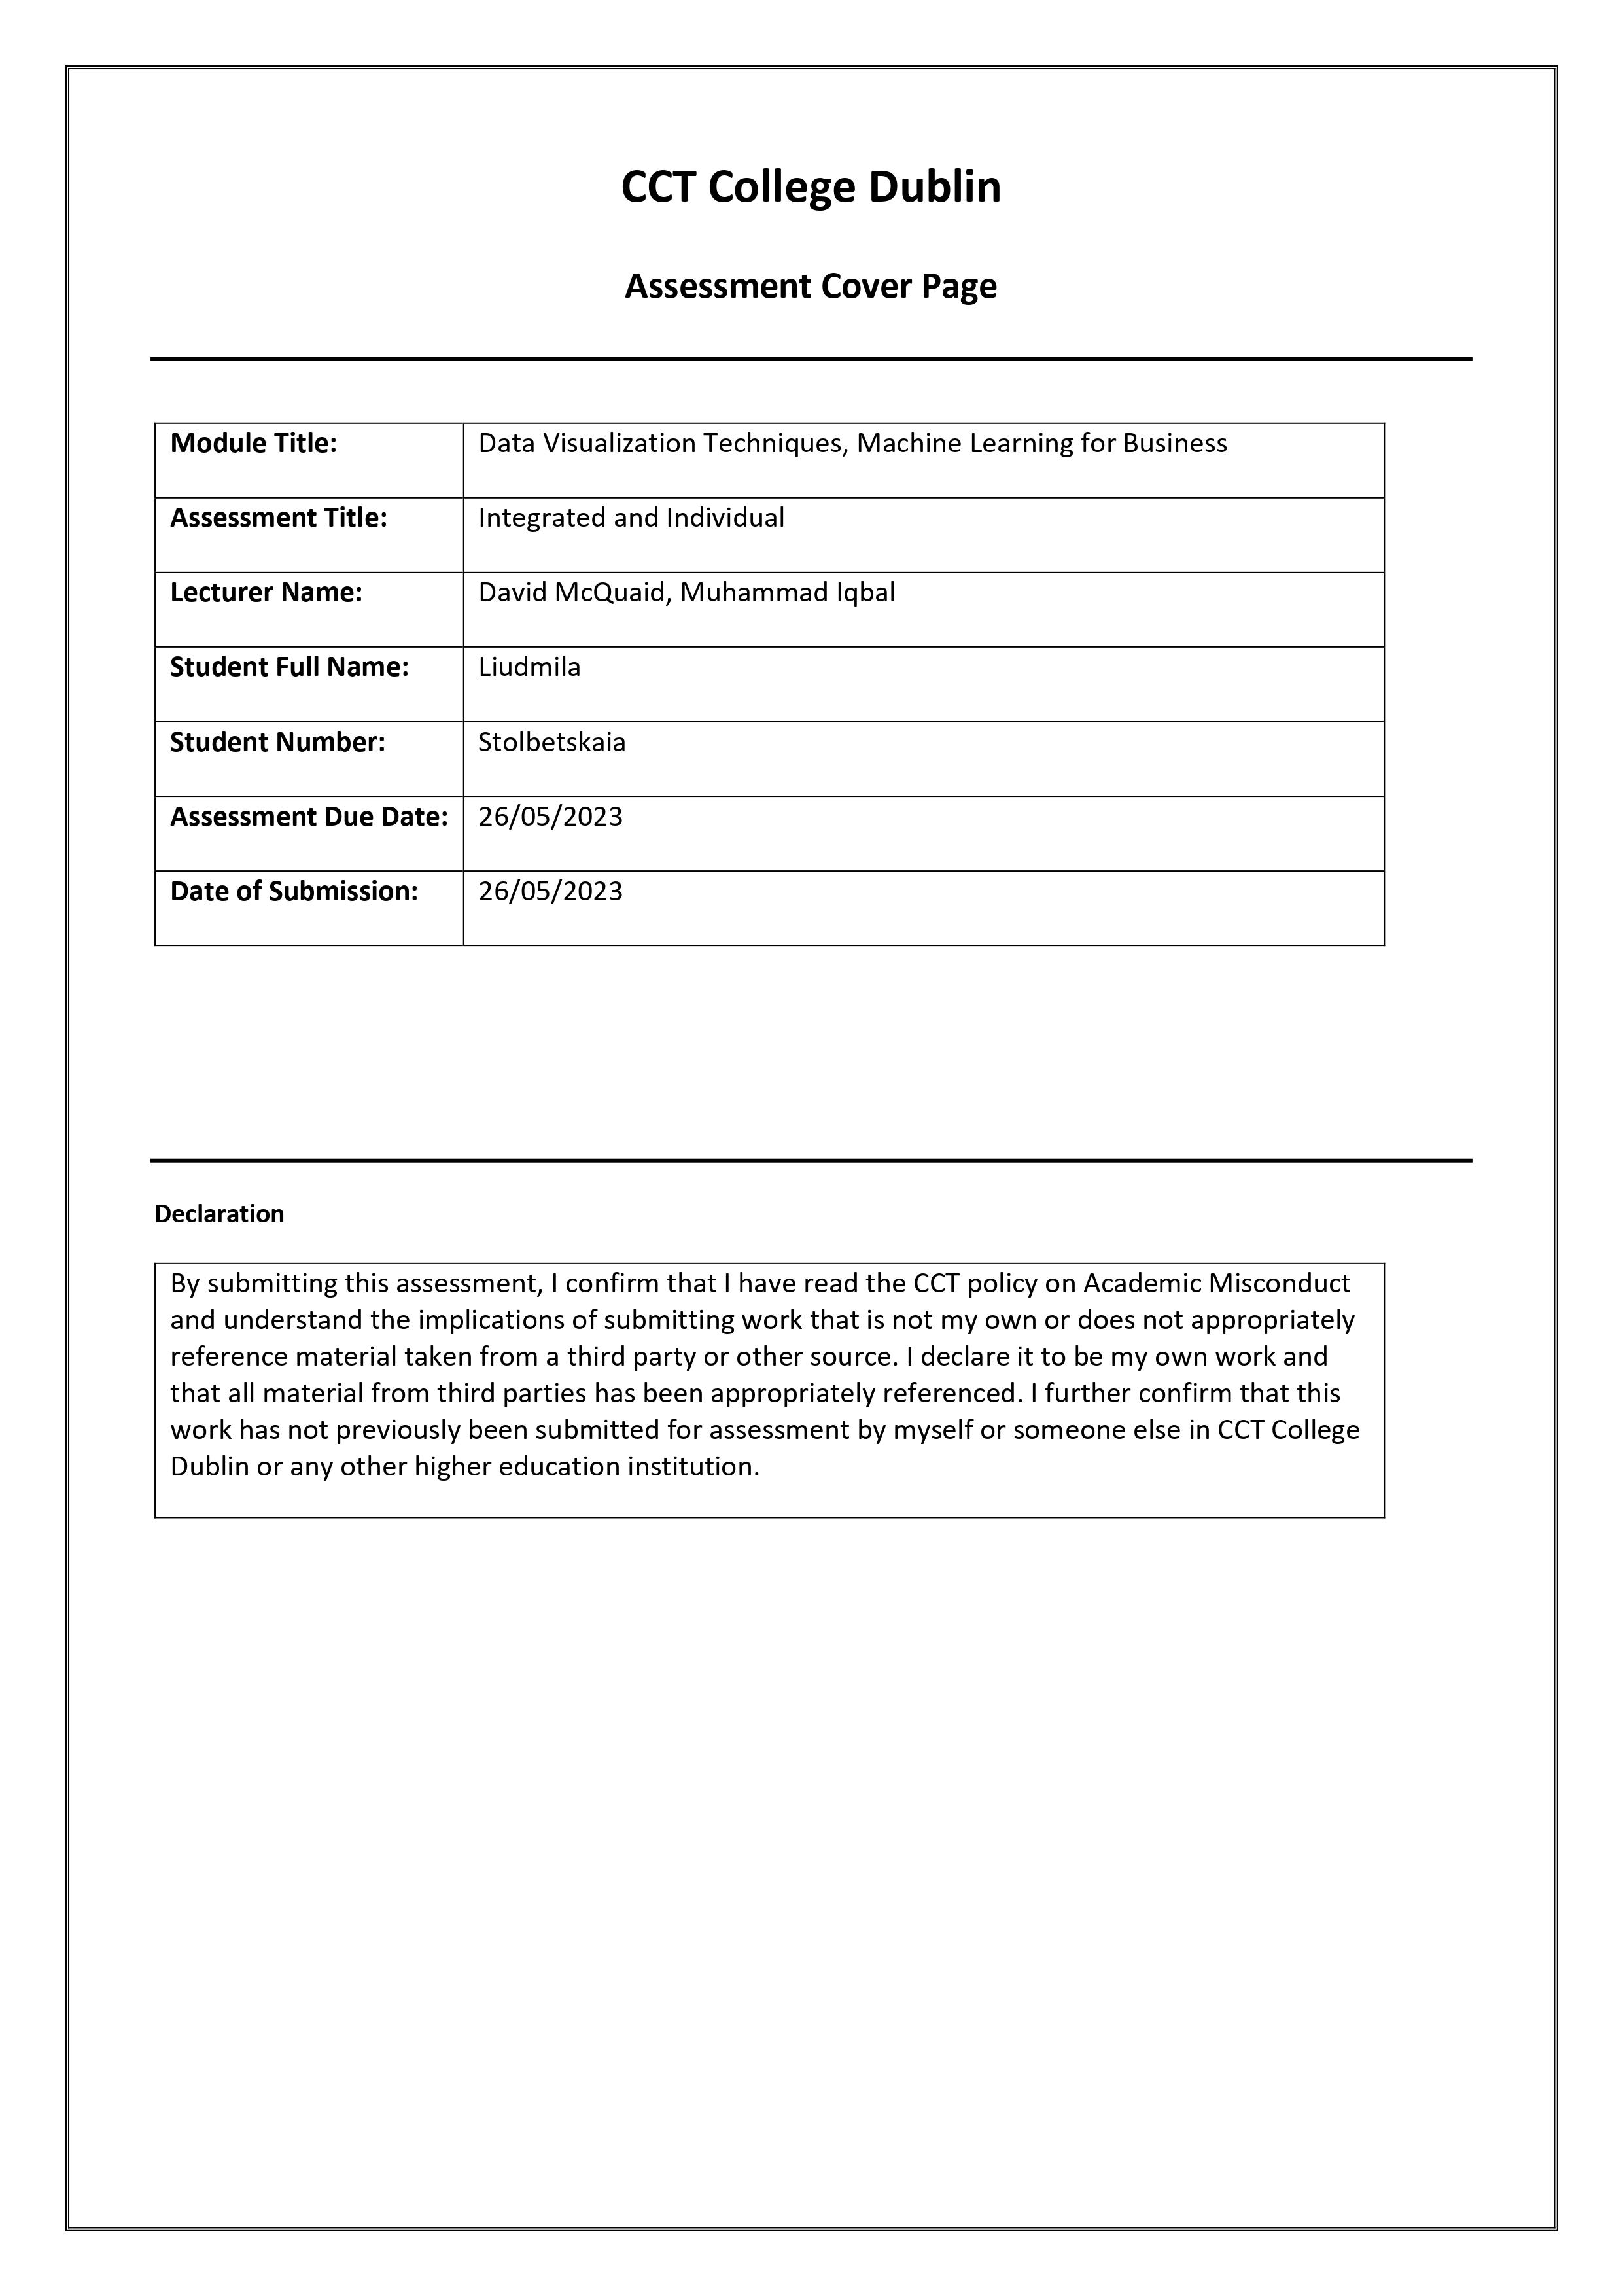

# Part 1

## What is the purpose of a recommendation system for online retail business in machine learning?

We are all regular users of popular platforms like Netflix, Amazon, Spotify, and others, where we receive numerous recommendations on what to watch, listen to, and buy. Behind these recommendations lies an amazing tool known as Machine Learning Algorithm. This algorithm processes our personal information, such as browsing history, preferences, and demographics, to generate tailored product suggestions for us. 

We are all regular users of popular platforms like Netflix, Amazon, Spotify, and others, where we receive numerous recommendations on what to watch, listen to, and buy. Behind these recommendations lies an amazing tool known as Machine Learning Algorithm. This algorithm processes our personal information, such as browsing history, preferences, and demographics, to generate tailored product suggestions for us. 

It is all important for online bussnes. I will bring examples of the most important goals which busness can achive: 

*   Better user experience
Recommendation systems improve the user experience by providing personalised content. Users feel more engaged and satisfied with the service. It increases customer retention and loyalty.

*   Focus on the right product
Recommendation systems help businesses understand user behaviour and their preferences. This information allows businesses to find out products that are most likely to match the audience

*   Sales drive
Recommendation systems can improve conversion and drive more sales by suggesting relevant products based on user preferences, browsing history and previous orders.  

*   Data-driven decision-making
Recommendation systems gather customer and sales data and compile them.  Businesses can analyse this data to gain insights into customer preferences, trends, and market demands. Providing managers with valuable insights into product development, inventory management, marketing and sales strategies.

*   Revenue growth 
Recommendation systems help grow revenue by providing personalised suggestions. Businesses can maximize their potential for selling cross-selling

*   Personalised Marketing and Advertising
 Recommendation systems help businesses help to deliver targeted ads and promotions to specific groups of customers. This makes their marketing efforts more effective and impactful, reaching the right people with the right messages.


Overall, recommendation systems play a crucial role in business development. It allows businesses to improve customer service, increase the number of sales, and reduce marketing investment. 

 
## Briefly compare Content and Collaborative filtering using any dataset of your choice. 

Recommendation system design has different approaches:

*   Collaborative filtering
*   Content-based filtering

**Collaborative filtering** is also split into two categories such as user-user collaborative filtering and item-item collaborative filtering. 

> **User- user** is filtering information by using interactions and data collected from different users. The fundamental idea of it customers who bought the same items will likely agree again in the future. The algorithm identifies users by comparing their historical item ratings or interactions. 
**Item-item** is filtering information by using recommendations made based on the similarity between items. The fundamental idea of the algorithm is to analyse the historical preferences and ratings of users to identify items that are frequently preferred together. If a user shows positive behaviour toward a particular item, the system will recommend the item the system will recommend similar items that have been favoured by other users who also liked the Item

**Content-based filtering**
Based on what users like, the algorithm will simply pick items with similar content to recommend. The filtering primarily focuses on the attributes of items, such as price, category, and other features that are defined using specific keywords and tags. It also takes into account user preferences taken from their purchases and feedback related to those items.




**ISBN:** Books are identified by their respective. Invalid ISBNs have already been removed from the dataset. 

**Content-based information:**

Book-Title

Book-Author

Year-Of-Publication 

Publisher

The data was obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. 

**URLs** linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, and large. These URLs point to the Amazon website.

In [65]:
#reach to the Google drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [67]:
#Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading the files with` pd.read_csv` function

I will read 3 datasets named books, ratings and users.

In [68]:
#read the dataset
books= pd.read_csv("/content/drive/MyDrive/Data Analytics/ML&Data_CA2/Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [69]:
ratings = pd.read_csv("/content/drive/MyDrive/Data Analytics/ML&Data_CA2/Ratings.csv")
ratings


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [70]:
users = pd.read_csv("/content/drive/MyDrive/Data Analytics/ML&Data_CA2/Users.csv")
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.000
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


### EDA

I will the data of each data frame in order to find the size, types of variables and missing values. 

 **Shape** 



In [71]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


We do have the same number of columns for users and ratings. I will merge them together in order to have a united data frame. It will make the analysis easier. 

**Info**
I will `info() `function to see the data insights. 


In [72]:
print(books.info())
print()
print(ratings.info())
print()
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2)

**Missing Values**

I have noticed Book Autore, Publisher and Image-URL-L have missing values. 

I will use `isna()` and sum() functions, to sum up missing values from books

In [73]:
print("Null values for books:\n", books.isna().sum())
print()
print("Null values for ratings:\n", ratings.isna().sum())
print()
print("Null Values for users:\n", users.isna().sum())

Null values for books:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Null values for ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Null Values for users:
 User-ID          0
Location         0
Age         110762
dtype: int64


**Merging**

Merging the data frames book and rating into one data frame based on the values ISNB. This allows me to have a compiled data frame which includes both book information and the corresponding ratings for those books.

In [74]:
books_df=books.merge(ratings,on="ISBN")
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,8,0
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,8,0
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,3363,0


I will drop extra columns that I have got after merging the data frames named "Image-URL-S", "Image-URL-M". They provide images, however, I can keep only one. It will be used to provide a link for the book. 

`drop()` remove the columns, `raname()` rename the columns.

**Merge data_df and users data frame.** 

`copy()` ensures that the original books_df data frame remains unchanged, 
`dropna()` dropping NaN values, `reset_index()` of the df data frame after dropping rows, drop() dropping a few columns such as "ISBN","Image-URL-S","Image-URL-M and removing columns with Rating = 0.  `lambda ` removes any non-alphanumeric characters and underscores from the book titles using regular expressions. 


In [75]:
import re

df=books_df.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating
0,074322678X,Where You ll Find Me And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,8,5
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,8,5
5,1558746218,A Second Chicken Soup for the Woman s Soul Chi...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,61501,7
6,1558746218,A Second Chicken Soup for the Woman s Soul Chi...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,148514,10
10,1558746218,A Second Chicken Soup for the Woman s Soul Chi...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,263256,10


In [76]:
df.shape

(80800, 8)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80800 entries, 0 to 196820
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 80800 non-null  object
 1   Book-Title           80800 non-null  object
 2   Book-Author          80800 non-null  object
 3   Year-Of-Publication  80800 non-null  object
 4   Publisher            80800 non-null  object
 5   Image-URL-L          80800 non-null  object
 6   User-ID              80800 non-null  int64 
 7   Book-Rating          80800 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.5+ MB


I have completed the data frame with all tables together. 

I noticed that Year-Of-Publication should be transformed into a numeric value. I will change the data type of the feature. 

In [78]:
df = df.dropna()
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)
df['Year-Of-Publication'].dtype

dtype('int64')

In [79]:
df["Year-Of-Publication"].isna().sum()

0

In [80]:
print(df.describe())
print()
print(df.describe(include=["O"]))

       Year-Of-Publication    User-ID  Book-Rating
count            80800.000  80800.000    80800.000
mean              1938.965 134425.771        7.595
std                335.591  80919.081        1.878
min                  0.000      8.000        1.000
25%               1994.000  65377.000        7.000
50%               1999.000 132492.000        8.000
75%               2001.000 204864.000        9.000
max               2037.000 278854.000       10.000

              ISBN       Book-Title    Book-Author Publisher  \
count        80800            80800          80800     80800   
unique       41445            39952          24304      6675   
top     059035342X  A Painted House  Jack Canfield      Mira   
freq           313              363            765      1982   

                                              Image-URL-L  
count                                               80800  
unique                                              41326  
top     http://images.amazon.com/images

I am wondering what years most of the book were published. It can be usefull for marketing analysis. 

Text(0.5, 1.0, 'Number of the games during the period')

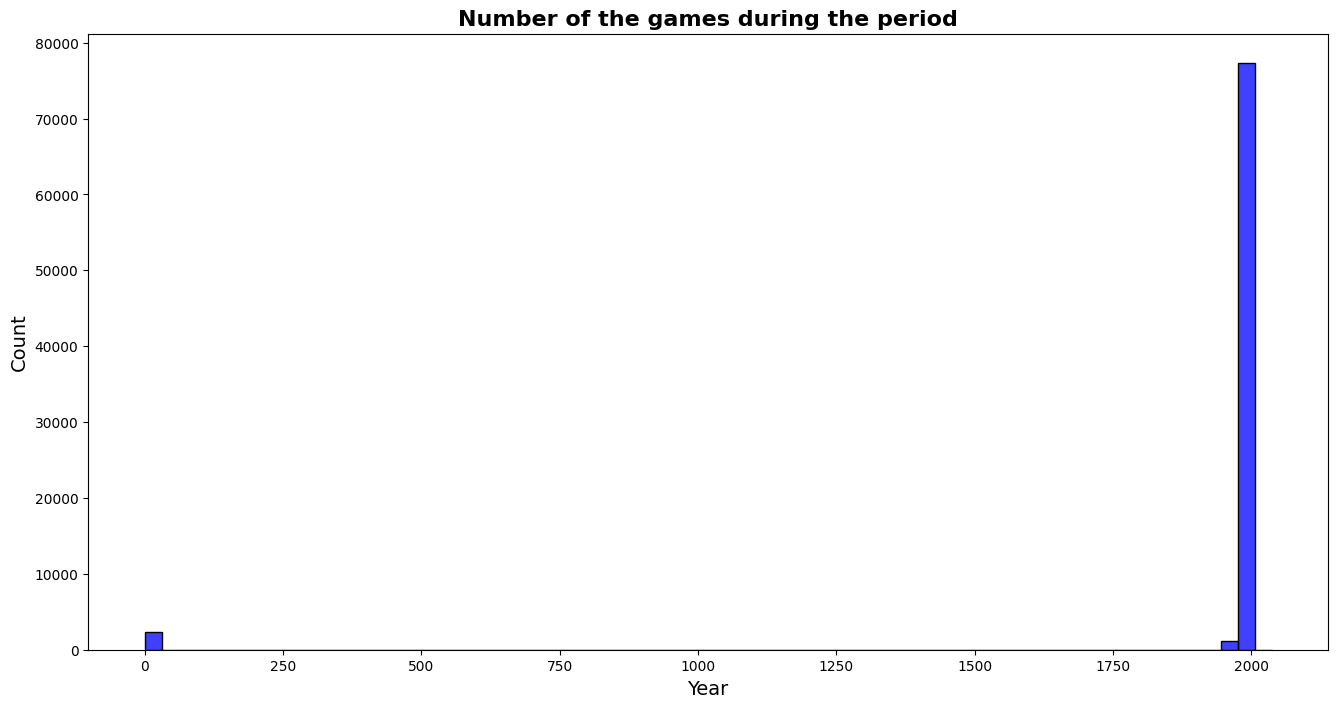

In [81]:
plt.figure(figsize = (16,8))

sns.histplot(df["Year-Of-Publication"], color = 'b', bins =66)

# Add labels and title 
plt.xlabel('Year', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Number of the games during the period', size = 16, fontweight = 'bold')

It is not a clear representation, however, we can see most of the books were published in 20 - 21 centres and the number is only growing. 

It is also interesting to know what book is the most frequent in the data set. 

In [82]:
Books_counted = df["Book-Title"].value_counts().head(10)
Books_counted

A Painted House                                                 363
Harry Potter and the Sorcerer s Stone Harry Potter Paperback    315
Snow Falling on Cedars                                          260
The Firm                                                        210
Harry Potter and the Order of the Phoenix Book 5                207
The No 1 Ladies Detective Agency Today Show Book Club 8         183
The Bridges of Madison County                                   153
How to Be Good                                                  150
The Perfect Storm A True Story of Men Against the Sea           141
The Rainmaker                                                   140
Name: Book-Title, dtype: int64

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

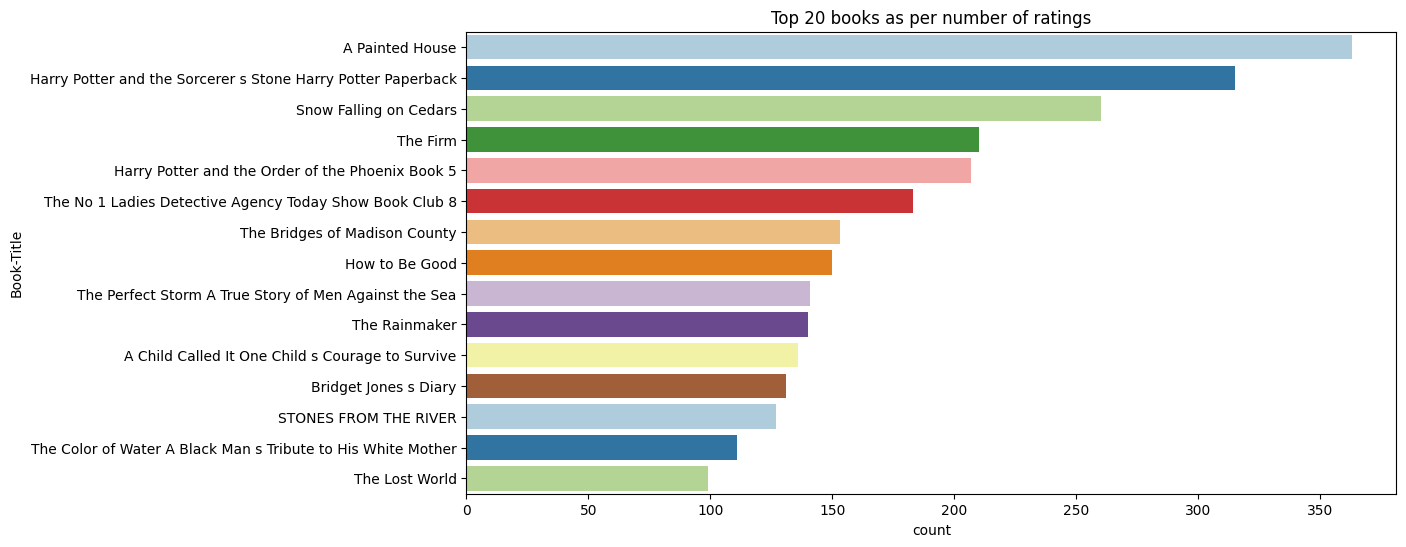

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title",palette = 'Paired',data= df, order=df['Book-Title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

In the data set the most important features for recommendation are:

**User-ID, Book-Title, ISBN and Rating:**  

Sometimes users give a rating, sometimes they do not vote at all and it depends on personal preferences. 

I will display the rating of the books.

As the recommendation system is based on the rating, I will create a feature avg-rating where I store the mean of each rated book. It is useful information as it brings an understanding of how good the book is among users.

I will group the books by their unique number. 

In [84]:
num_rating_df = df.groupby('ISBN').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'Num-Ratings'}, inplace=True)
num_rating_df.head(10)

,ISBN,Num-Ratings
0,000104687X,1
1,000104799X,2
2,000160418X,1
3,000215871X,1
4,000221766X,1
5,000222335X,1
6,000222674X,1
7,000223257X,1
8,000225056X,1
9,000225414X,2


We can see that some books have only ratings = 1 or 2. It might be due to a lack of sales or sometimes people do not rate the books. This number is very low.  

I will also display the average rating in order to see what rating the books have. The feature will be one of the most important in the analysis.

In [85]:
avg_rating_df = df.groupby('ISBN').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'Avg-Ratings'}, inplace=True)
avg_rating_df.head(-10)

,ISBN,Avg-Ratings
0,000104687X,6.000
1,000104799X,7.500
2,000160418X,7.000
3,000215871X,7.000
4,000221766X,8.000
...,...,...
41430,B0000T6KHI,10.000
41431,B0000T6KIM,4.000
41432,B0000VZEH8,9.000
41433,B0000VZEJQ,10.000


We can see that differently rated books. I will create a table where I can store the number of ratings and average ratings. 

In [86]:
popularity_df = num_rating_df.merge(avg_rating_df, on='ISBN')
popularity_df.head(10)

,ISBN,Num-Ratings,Avg-Ratings
0,000104687X,1,6.000
1,000104799X,2,7.500
2,000160418X,1,7.000
3,000215871X,1,7.000
4,000221766X,1,8.000
5,000222335X,1,7.000
6,000222674X,1,9.000
7,000223257X,1,7.000
8,000225056X,1,10.000
9,000225414X,2,7.500


I have multiple books with average ratings from 1 to 10. This gives me some insides how popular can be a book. I would be focused on the most rated books and high rated. 

I will filter the data before the ML application. It is important for multiple reasons:

*   Data quality. I will focus on the most important data. For example, I can set min number of ratings to 80 and it will provide me with books which have many votes. 

*  Relevance. I will be able to recommend relevant content for the users. The system will recommend popular and well-rated books.  

*   Efficiency. The system will be able to have fast performance as I will reduce the size of the dataset to a more manageable one.

It is important for the recommendation system to have good quality data to recommend books that are more or less popular among readers and will provide relevant recommendations with highly relevant content. 

I run the code without the limit at first. It took me a while to process the data. After experimenting and researching, I found out that it is useful to set a limit. The limit will not take low numbers of ratings into account as this data is not representative. 

I set 80 as min as there are not many books with high ratings. I did a few different iterations with higher limits. It gave me a very small amount of data to process for ML Algorithm.




In [87]:
top_books = popularity_df[popularity_df['Num-Ratings']>=80].sort_values("Avg-Ratings",ascending=False)
top_books.head(10)

,ISBN,Num-Ratings,Avg-Ratings
3872,043935806X,206,9.034
5353,059035342X,313,8.939
9415,1400031354,95,8.453
6488,068484267X,98,8.265
17169,1573225789,92,8.250
6493,068484477X,125,8.056
9455,1400034779,183,8.049
7709,080410753X,98,8.010
12491,1558743669,134,8.000
7705,080410526X,93,7.989


In [88]:
top_books.shape

(29, 3)

We have a dataset with 29 rows with a number of rating higher than 80 and with a high average rating. 

I will create a data frame with the number of ratings, average ratings and other features in order to perform the recommendation

In [89]:
final_top_books= top_books.merge(df, on='ISBN').drop_duplicates('ISBN')[['User-ID', 'ISBN',
                                                                                  'Book-Title',
                                                                                   'Book-Author',
                                                                                   'Publisher',
                                                                                   'Num-Ratings',
                                                                                   'Avg-Ratings',
                                                                                   'Image-URL-L'
                                                                                    ]]
final_top_books.head(5)

,User-ID,ISBN,Book-Title,Book-Author,Publisher,Num-Ratings,Avg-Ratings,Image-URL-L
0,276788,043935806X,Harry Potter and the Order of the Phoenix Book 5,J. K. Rowling,Scholastic,206,9.034,http://images.amazon.com/images/P/043935806X.0...
206,278162,059035342X,Harry Potter and the Sorcerer s Stone Harry Po...,J. K. Rowling,Arthur A. Levine Books,313,8.939,http://images.amazon.com/images/P/059035342X.0...
519,277623,1400031354,Tears of the Giraffe No 1 Ladies Detective Agency,Alexander McCall Smith,Anchor,95,8.453,http://images.amazon.com/images/P/1400031354.0...
614,503,068484267X,Angela s Ashes A Memoir,Frank McCourt,Scribner,98,8.265,http://images.amazon.com/images/P/068484267X.0...
712,3814,1573225789,The Color of Water A Black Man s Tribute to Hi...,James McBride,Riverhead Books,92,8.250,http://images.amazon.com/images/P/1573225789.0...


In [90]:
final_top_books.shape

(29, 8)

We have a final dataset with all the features. 

In the next step, I will start the preparation for ML modelling. 
I will create a rating matrix based on the user's Id and Book title. As you remember instead of the book title I took ISBN before. However, for ML Modeling, I will use the title as it will give the recommendation based on it.

Why title is important?  Book titles are important because they give us a quick idea of what a book is about. They summarize the content and theme in a short and clear way. Titles also help in recommending books that match a person's interests and preferences. So, by looking at the title, we can get a good sense of what the book is about and find books that we might enjoy reading Book titles often capture the context or topic of a book. By leveraging this information. Other features also could be considered. 

**Rating Matrix**

I will use `pivot() `function to reshape the data. It will transform columns into new dimensions.

In [91]:
rating_matrix = final_top_books.pivot(index='Book-Title',columns='User-ID',values='Avg-Ratings')
rating_matrix.head()

User-ID,388,503,1436,1548,2036,3145,3167,3542,3709,3814,...,277235,277623,277997,278162,278202,278346,278390,278582,278633,278832
Book-Title,,,,,,,,,,,,,,,,,,,,,
A Child Called It One Child s Courage to Survive,NaN,8.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Painted House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All I Really Need to Know,NaN,NaN,NaN,NaN,NaN,NaN,7.989,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angela s Ashes A Memoir,NaN,8.265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At Home in Mitford The Mitford Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.771,NaN,NaN,NaN,NaN,NaN


As we can see the matrix has been transposed. At this data set, we have many Nan Values which will be filled with 0 in order to run ML Model.

In [92]:
A= rating_matrix.fillna(0)
A.head()

User-ID,388,503,1436,1548,2036,3145,3167,3542,3709,3814,...,277235,277623,277997,278162,278202,278346,278390,278582,278633,278832
Book-Title,,,,,,,,,,,,,,,,,,,,,
A Child Called It One Child s Courage to Survive,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Painted House,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
All I Really Need to Know,0.000,0.000,0.000,0.000,0.000,0.000,7.989,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Angela s Ashes A Memoir,0.000,8.265,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
At Home in Mitford The Mitford Years,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,7.771,0.000,0.000,0.000,0.000,0.000


In [93]:
A.shape
print('Shape of final dataset : {0} x {1}'.format(A.shape[0], A.shape[1]))

Shape of final dataset : 28 x 28


### Content Based Recomendation. 

Cosine Similarity.

Cosine Similarity is a commonly used technique to work with content-based recommendation systems such as movies, articles and books as we are working. 

How does it work? 
It is a mathematical method that helps us identify how similar two sets of items are. It does this by examining the angle between the two sets and checking if they're pointing in a similar direction.  Cosine similarity is commonly used to measure the similarity between documents.

By applying this technique, we can gauge how much two texts resemble each other in terms of their content and meaning. (Jiawei Han. Data Mining., 2022)

I will load a library to work from sklearn 

In [94]:
from sklearn.metrics.pairwise import cosine_similarity 

In [95]:
similarity_score = cosine_similarity(A)

In [96]:
similarity_score.shape

(28, 28)

The purpose of finding similar books is to provide personalised recommendations to users, enhancing their book discovery and improving the overall user experience.

Finding similar books through personalised recommendations improve user engagement, increases book sales, and improves customer satisfaction by helping users discover books aligned with their interests and preferences.

I will apply a function which will find a book, the author of the book and a link to the image. 

The function will get the index of the book, pair each similarity score and store it in another variable as a top 5 rated. 

I will create an empty list called data where I will store similar items. 

I will create a loop which goes through each book in the similar_books list. Inside the loop, the code creates an empty list called an item to store information about each similar book. The code will find details in the title, author and image. And finally, I will append a list of data.

In [97]:
def recommend(book_name):
    index = np.where(A.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == A.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

**Result**

If we type name of the book which we filtered the system will recommend another book. For example I will take a book "A Painted House". 

Call the function in order to run recommendations

In [98]:
recommend("A Painted House")

[[],
 ['All I Really Need to Know',
  'ROBERT FULGHUM',
  'http://images.amazon.com/images/P/080410526X.01.MZZZZZZZ.jpg'],
 [],
 [],
 ['Bag of Bones',
  'Stephen King',
  'http://images.amazon.com/images/P/067102423X.01.MZZZZZZZ.jpg']]

We have recommendation for two books All I Really Need to Know by ROBERT FULGHUM and Bag of Bones by Stephen King. 

The content-based filtering  considered book attributes like titles,  to recommend books with similar characteristics. 



###  User - User/Item - Item Recomendation

Train and test machine learning models for the user-user or item-item collaborative filtering

So I can apply both user-user and item-item collaborative filtering. 

**User-User Collaborative Filtering:**
> In the dataset, I have columns for "User-ID" and "Book-Rating," which indicate user-item interactions. For user-user collaborative filtering, I can identify users who have similar preferences or rating patterns to a target user. I can calculate similarity metrics, such as cosine similarity or Pearson correlation, between users based on their book ratings. By finding users with similar preferences, I can recommend books that similar users love.



**Item-Item Collaborative Filtering:**

> For item-item collaborative filtering, I would focus on the similarity between books based on their ratings by users. I can calculate item-item similarity metrics to identify books that are frequently rated similarly by users. This approach allows me to recommend books that are similar to the ones a user has already interacted with or enjoyed.








**ITEM - ITEM**

I will work only with the item-to-item recommendation system as another type of recommendation system. 

I will perform very similar steps as I did before. I will create a data frame to display the most rated items. 

I will filter the data in order to have the most relevant data. I will work with users to have actively engaged with the system and provide a substantial amount of ratings. It helps to ensure that we have enough data from reliable and committed users. 

I will keep the number rating 80 as before and experiment with users


In [35]:
# replacing '-' with '_' and features name in lower case
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')
users.columns= users.columns.str.strip().str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [36]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [61]:
counts1 = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts = ratings['book_rating'].value_counts()
ratings = ratings[ratings['book_rating'].isin(counts[counts >= 100].index)]

In [60]:
rating_count = pd.DataFrame(ratings.groupby('isbn')['book_rating'].count())
rating_count.sort_values('book_rating', ascending=False).head()

,book_rating
isbn,
0971880107,365
0316666343,272
0060928336,221
0440214041,218
0385504209,217


I have the most rated books by isbn. I will work with these features. 

In [59]:
most_rated_books = pd.DataFrame({'isbn': ['0971880107', '0316666343', '0060928336', '0440214041', '0385504209']})
most_rated_books_summary = pd.merge(most_rated_books, books, on='isbn')

most_rated_books_summary

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


The book that received the most rating counts in this data set Wild Animus. The common this about books is that they are all novels. 

I will create a dataset where I will store user_id, isbn, book rating and book title. The rest of the features will be dropped. As before we still value the future book title and ISBN. User id  important for item-item filtering because it allows the system to personalize recommendations based on individual user preferences and behaviour. 


In [40]:
complite_book_rating =  pd.merge(ratings, books, on='isbn')
columns = ['year_of_publication', 'publisher', 'book_author', 'image_url_s', 'image_url_m', 'image_url_l']
combine_book_rating = complite_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,user_id,isbn,book_rating,book_title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


I will create a data frame with the book title and count ratings of the books. I did the same step for before. As we need to know how many votes each book has. I will work only with top-rated books. Also, I will remove rows where the book title is missing. 

In [41]:
complite_book_rating = complite_book_rating.dropna(axis = 0, subset = ['book_title'])

book_ratingCount = (complite_book_rating.
     groupby(by = ['book_title'])['book_rating'].
     count().
     reset_index().
     rename(columns = {'book_rating': 'totalRatingCount'})
     [['book_title', 'totalRatingCount']]
    )
book_ratingCount.head()

,book_title,totalRatingCount
0,Earth Prayers From around the World: 365 Pray...,3
1,Final Fantasy Anthology: Official Strategy Gu...,3
2,Flight of Fancy: American Heiresses (Zebra Ba...,1
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,1


I will cretae a table with total rating count. 

In [42]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'book_title', right_on = 'book_title', how = 'left')
rating_with_totalRatingCount.head()

,user_id,isbn,book_rating,book_title,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


We can check statistical distribution in order to the distribution on total rating. 


In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   36142.000
mean        2.185
std         5.084
min         1.000
25%         1.000
50%         1.000
75%         2.000
max       227.000
Name: totalRatingCount, dtype: float64


mean = 1. It says that on average, each book in the dataset has been rated once. This means that there is, on average, only one rating available per book.

In [44]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    4.000
0.910    4.000
0.920    4.000
0.930    5.000
0.940    5.000
0.950    6.000
0.960    7.000
0.970    9.000
0.980   12.000
0.990   19.000
Name: totalRatingCount, dtype: float64


This means that 90% of the books have a total rating = 4 or less, 91% have a count  = 4 or less, and so on. The quantiles provide an understanding of the distribution and how the values spread.


I am going to set popularity_threshold to 60, which means that only books with a total rating count of 60 or more will be included in the resulting DataFrame, rating_popular_book. This threshold is used to identify books that are relatively popular or have received a significant number of ratings. By setting a popularity threshold filter, we can make sure that the recommendations or analysis are focused on books that are widely loved and have many fans. It basically says us that the books in the dataset are more likely to be popular among a larger group of users. It will make the recommendations more relevant and appealing to a wider audience. In addition, it can help reduce noise in the dataset and focus on books that have a more stable rating. 

By applying this filter, we can focus on books that reach a high level of popularity. The head() function is then used to display the first few rows of the filtered DataFrame, giving us a glimpse of the popular books that meet the popularity threshold of 60 or more total ratings

I am doing this filtering differently from the previous model in order to the difference in performance.





In [45]:
popularity_threshold = 60
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,user_id,isbn,book_rating,book_title,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


We have a data frame with the most rated features. 

I would love to work more with the filtering. It is a very useful part of the process and in data preparation. There is not only one filter that we can apply we also can limit data bay age, location and so on. 

For example, is I want to improve my target I might focus only particular area. I will set the limit by the countries. I will set Ireland and The UK as they are close geographically. They might have similar interests as well. By applying filters to limit the data to specific countries like Ireland and the UK, we can conduct a more focused analysis and gain a better understanding of the target audience. This approach helps us to find region-specific trends and preferences, providing valuable insights for our analysis


In [46]:
combined = rating_popular_book.merge(users, left_on = 'user_id', right_on = 'user_id', how = 'left')

ir_uk_user_rating = combined[combined['location'].str.contains("ireland|united kingdom")]
ir_uk_user_rating= ir_uk_user_rating.drop('age', axis=1)
ir_uk_user_rating.head(50)

,user_id,isbn,book_rating,book_title,totalRatingCount,location
33,128696,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"southampton, england, united kingdom"
61,209516,002542730X,9,Politically Correct Bedtime Stories: Modern Ta...,82,"felixstowe, suffolk, united kingdom"
95,76626,014029628X,0,Girl in Hyacinth Blue,92,"london, england, united kingdom"
110,128696,014029628X,9,Girl in Hyacinth Blue,92,"southampton, england, united kingdom"
113,143792,014029628X,0,Girl in Hyacinth Blue,92,"nottingham, england, united kingdom"
278,128696,080410753X,0,The Kitchen God's Wife,101,"southampton, england, united kingdom"
299,180651,080410753X,0,The Kitchen God's Wife,101,"coventry, england, united kingdom"
358,62895,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,84,"chesterfield, derbyshire, united kingdom"
371,110029,1400031354,10,Tears of the Giraffe (No.1 Ladies Detective Ag...,84,"norwich, england, united kingdom"
393,170184,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,84,"melton mowbray, england, united kingdom"


So we have a dataset that contains users data from The UK and Ireland

I will apply KNN algorithm. It is also one of the most useful algorithms for collaborative filtering. 

It works by finding the K nearest neighbours to a target user or item based on their similarity in terms of ratings or other relevant features. The algorithm then uses the ratings or preferences of those neighbours to make recommendations. The algorithm is based on Euclidean distance. The algorithm calculates Euclidean distance between neighbours, in other words, finds the closest points in the data. The algorithm finds the K nearest neighbours based on the similarity of their ratings or preferences, and these neighbours' ratings are used to generate recommendations


To perform the algorithm I will import `csr_matrix` to transpose the matrix and from sklearn  `NearestNeighbors` to apply the algorithm.



In [47]:
from scipy.sparse import csr_matrix

ir_uk_user_rating = ir_uk_user_rating.drop_duplicates(['user_id', 'book_title'])
ir_uk_user_rating_pivot = ir_uk_user_rating.pivot(index = 'book_title', columns = 'user_id', values = 'book_rating').fillna(0)
ir_uk_user_rating_matrix = csr_matrix(ir_uk_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(ir_uk_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

**Testing the model**

I am going to test the model. It will measure the distances to find the “closeness” of instances. Is measures the distance between data points to find their similarity or proximity. Similar data points are more likely to belong to the same class.

In [58]:
query_index = np.random.choice(ir_uk_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(ir_uk_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(ir_uk_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, ir_uk_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Key of Light (Key Trilogy (Paperback)):

1: Fingersmith, with distance of 0.5440392474124468:
2: The Bridges of Madison County, with distance of 1.0:
3: The Color of Water: A Black Man's Tribute to His White Mother, with distance of 1.0:
4: Tears of the Giraffe (No.1 Ladies Detective Agency), with distance of 1.0:


Recommendations for Key of Light (Key Trilogy (Paperback)):

1: Fingersmith, with distance of 0.5440392474124468:
2: The Bridges of Madison County, with distance of 1.0:
3: The Color of Water: A Black Man's Tribute to His White Mother, with distance of 1.0:
4: Tears of the Giraffe (No.1 Ladies Detective Agency), with distance of 1.0:

The recommendations provided have distances ranging from 0.5 to 1.0. A distance of 0.5 detect close similarity, while a distance of 1.0 gives us a less similar match. 

It's also important to remember that the  distances may vary depending on the algorithm used. Generally, a lower distance indicates a stronger recommendation, showing books that are more closely related to the original book. Low distance is close neighbour and high distance is a far neighbour. 


I applied different numbers of neighbours =5. 

The distance outcome has different values.  Which can be considered not always important as it depends on the research. In this particular case after experimenting with data it has changed depending on the rating.

### Final Comparison and Recommendation

Content filtering can use attributes of variables, such as the book title, author, publication year, publisher, and image URL in order to make recommendations. In this case, content-based filtering could recommend books with similar attributes such as titles, authors, publication years or publishers.

On another hand, collaborative filtering takes into consideration user behaviour and preferences to generate recommendations. It will find similarities, and patterns in users' behaviour and bought items. In the dataset, collaborative filtering would take the book ratings to identify similar users and recommend books that users with similar preferences enjoyed. I would say the recommendations will be based on the ratings and preferences of other users who rated the same or similar books.

In a nutshell, content filtering can provide recommendations based on item characteristics alone. Collaborative filtering can suggest items that users with similar tastes, potentially introducing new options




# Conclusion: 

I performed data preparation of books, users, and rating data sets.  Created two different ways for data preprocessing and different filtering based on rating count, average rating and countries.  I performed two different types of data recommendation systems such as content-based recommendation and item-to-item. Both models gave me recommendations based on title and book rating. 

 The content-based recommendation is very efficient in suggesting books with similar attributes such as titles. The application of author and title also can be considered in further research. 

 Collaborative filtering introduced items that users with similar tastes enjoyed by average rating. It is highly important to consider user feedback and leveraging user-item interactions to generate personalised recommendations. 



# Reference List:
- Analytics Vidhya. (2021). A Comprehensive Guide on Market Basket Analysis. [Online] Available at: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/#Market_Basket_Analysis_From_the_Customers%E2%80%99_Perspective [Accessed 19 May 2023].

- Built In. (n.d.). Collaborative Filtering Recommender System. [Online] Retrieved from https://builtin.com/data-science/collaborative-filtering-recommender-system (Accessed: 16 May)

- IBM. (n.d.). KNN Algorithm - How it works? [Online] Retrieved from https://www.ibm.com/topics/knn (Accessed: [26 May])

- Inside Learning Machines. (n.d.). KNN Recommender. [Online] Retrieved from https://insidelearningmachines.com/knn_recommender/ (Accessed: 20 May)

- Itransition. (n.d.). Machine Learning-Based Recommendation Systems. [Online] Retrieved from https://www.itransition.com/machine-learning/recommendation-systems (Accessed: 17 May)

- Krish Naik YouTube. (n.d.). How Does K-Nearest Neighbors (KNN) Algorithm Work? [Online] Retrieved from https://www.youtube.com/watch?v=-agdLu4tPxk&t=760s (Accessed: 21 May)

- Machine Learning Plus. (n.d.). Cosine Similarity in NLP. [Online] Retrieved from https://www.machinelearningplus.com/nlp/cosine-similarity/ (Accessed: 21 May)

- Qymatix. (n.d.). Recommendation Systems Nowadays. [Online] Retrieved from https://qymatix.de/en/recommendation-systems-nowadays/#:~:text=What%20is%20a%20Recommendation%20System,or%20observed%20behavior%20about%20item. (Accessed: 21 May)

- ScienceDirect. (n.d.). Cosine Similarity. [Online] Retrieved from https://www.sciencedirect.com/topics/computer-science/cosine-similarity#:~:text=Cosine%20similarity%20measures%20the%20similarity,document%20similarity%20in%20text%20analysis. (Accessed: 18 May)

- Towards Data Science. (n.d.). User-to-User vs. Item-to-Item Collaborative Filtering Explained Through Simple Examples (Part 1). [Online] Retrieved from https://towardsdatascience.com/user-to-user-vs-item-to-item-collaborative-filtering-explained-through-simple-examples-part-1-f133bec23a58 (Accessed: 19 May)

- CampusX (2022). Book Recommender System | Machine Learning Project | Collaborative Filtering Based Recommender Sys. [Online] Retrieved from https://www.youtube.com/watch?v=1YoD0fg3_EM (Accessed: 16 May)

- Krish Naik. (n.d.).Tutorial 4- Book Recommendation using Collaborative Filtering [Online] Retrieved from https://www.youtube.com/watch?v=-agdLu4tPxk&t=760s (Accessed: 21 May)